<a href="https://colab.research.google.com/github/Gumilevski/face_detection_with_CNNs/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras_preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
from google.colab import drive
import sys

drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/face_detection'

if path not in sys.path:
  sys.path.append('/content/drive/My Drive/Colab Notebooks/face_detection')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from importlib import reload
from importlib.machinery import SourceFileLoader

MODULE_PATH = r'/content/drive/My Drive/Colab Notebooks/face_detection/data_script.py'
load_data_module = SourceFileLoader('data_script', MODULE_PATH).load_module()

# load_data_module = reload(load_data_module)

train_generator, valid_generator, test_generator = load_data_module.generate_data()

/content/drive/My Drive/Colab Notebooks/face_detection
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 15856 images.
Found 3965 images.
Found 2000 images.


In [0]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/face_detection/models

/content/drive/My Drive/Colab Notebooks/face_detection/models


In [0]:
model = Sequential()
# (N - F) / stride + 1
model.add(Conv2D(16, (10, 10), strides=2, input_shape=(256, 256, 3)))
# 256x256x3 -> 124x124x16
model.add(layers.BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (6, 6), strides=2))
# 124x124x16 -> 60x60x32
model.add(layers.BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (6, 6), strides=2))
# 60x60x32 -> 28x28x32
model.add(layers.BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (5, 5)))
# 28x28x32 -> 24x24x64 
model.add(layers.BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) #->12x12x64

model.add(Conv2D(128, (5, 5)))
# 12x12x64 -> 8x8x128 
model.add(layers.BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # -> 4x4x128

model.add(Conv2D(256, (4, 4)))
model.add(layers.BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(256, activation='relu')) 
model.add(Dense(4, activation='linear'))

model.compile(optimizers.Adam(lr=6e-4), loss='mean_squared_error', metrics=['accuracy'])


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 124, 124, 16)      4816      
_________________________________________________________________
batch_normalization_7 (Batch (None, 124, 124, 16)      64        
_________________________________________________________________
activation_7 (Activation)    (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 32)        18464     
_________________________________________________________________
batch_normalization_8 (Batch (None, 60, 60, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        36896     
__________

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
247/247 [==============================] - 7622s 31s/step - loss: 4141.7946 - acc: 0.6037 - val_loss: 2470.7255 - val_acc: 0.7355

Epoch 00001: val_loss improved from inf to 2470.72551, saving model to cnn.h5
Epoch 2/100
247/247 [==============================] - 298s 1s/step - loss: 941.9134 - acc: 0.7456 - val_loss: 1029.3285 - val_acc: 0.7318

Epoch 00002: val_loss improved from 2470.72551 to 1029.32849, saving model to cnn.h5
Epoch 3/100
247/247 [==============================] - 287s 1s/step - loss: 696.2320 - acc: 0.7775 - val_loss: 914.4566 - val_acc: 0.7796

Epoch 00003: val_loss improved from 1029.32849 to 914.45664, saving model to cnn.h5
Epoch 4/100
247/247 [==============================] - 288s 1s/step - loss: 545.0527 - acc: 0.8415 - val_loss: 725.5145 - val_acc: 0.7374

Epoch 00004: val_loss improved from 914.45664 to 725.51454, saving model to cnn.h5
Epoch 5/100
247/247 [==============================] - 287s 1

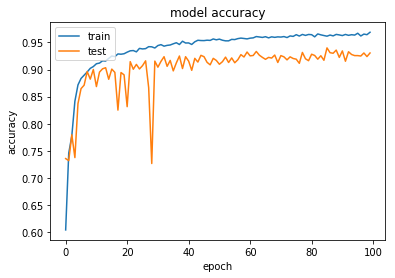

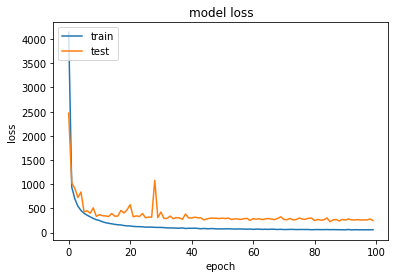

In [0]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

checkpoint = ModelCheckpoint("cnn.h5", monitor='val_loss', verbose=1, 
                             save_best_only=True, save_weights_only=False)
early = EarlyStopping(monitor='val_loss', verbose=1, patience = 25)

history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=100, callbacks=[early, checkpoint]
)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()